# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

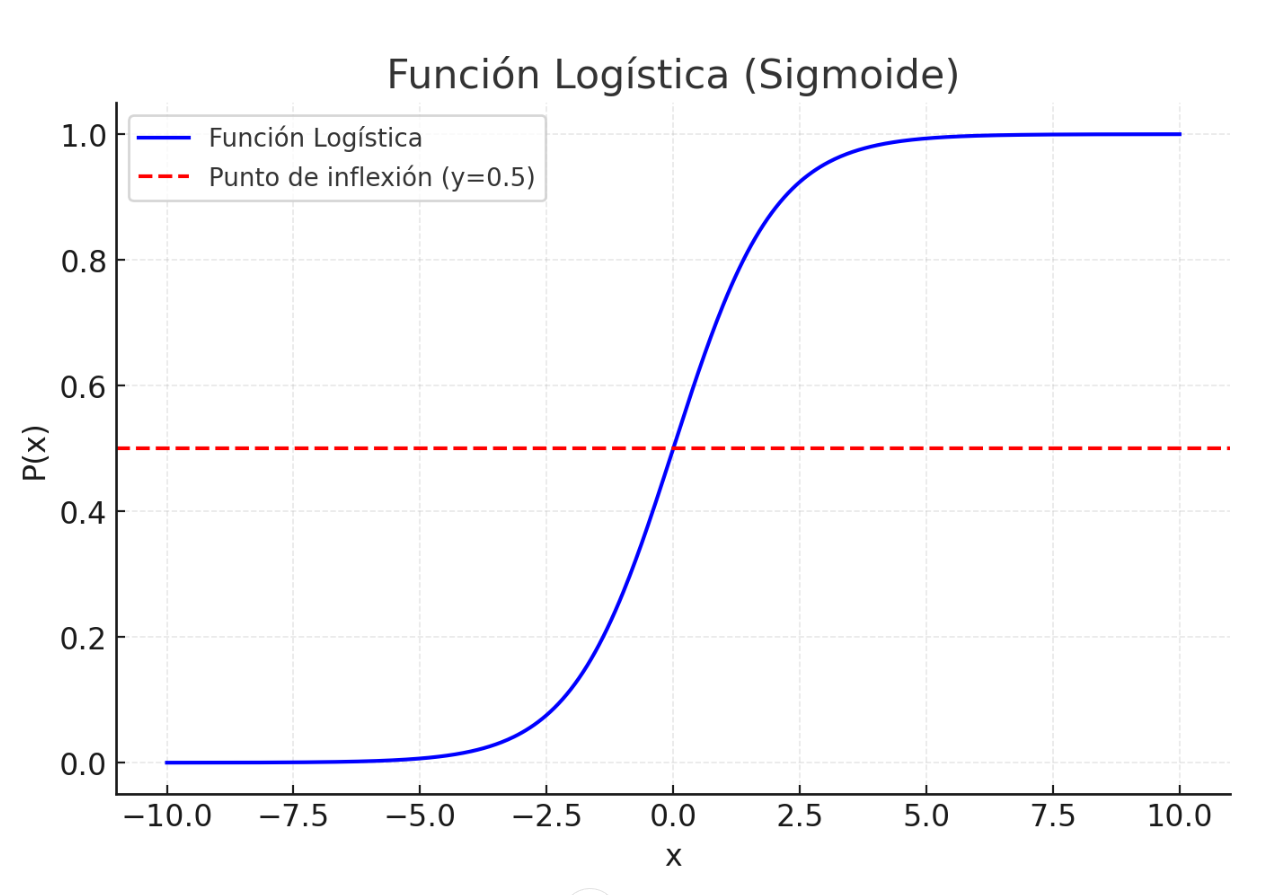

## Cargamos los datos de entrada del archivo csv

In [36]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

clases = {
    0: 'Windows',
    1: 'Linux',
    2: 'Mac'
}

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [37]:
dataframe['clase'].value_counts(normalize=True)

clase
0    0.505882
2    0.258824
1    0.235294
Name: proportion, dtype: float64

In [38]:
dataframe['clase'].value_counts()

clase
0    86
2    44
1    40
Name: count, dtype: int64

In [39]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


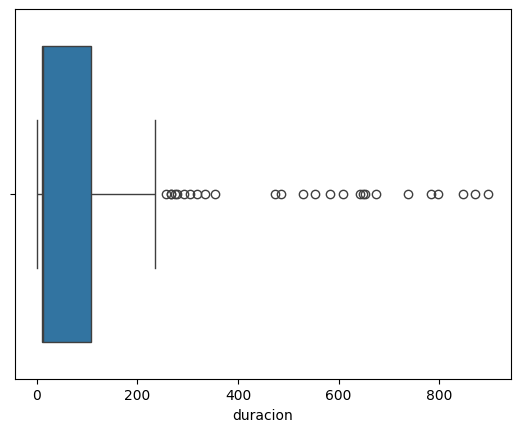

In [40]:
sns.boxplot(x= dataframe['duracion']);

C:\Users\hegoi\AppData\Local\Temp\ipykernel_11124\1588674319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['duracion']);


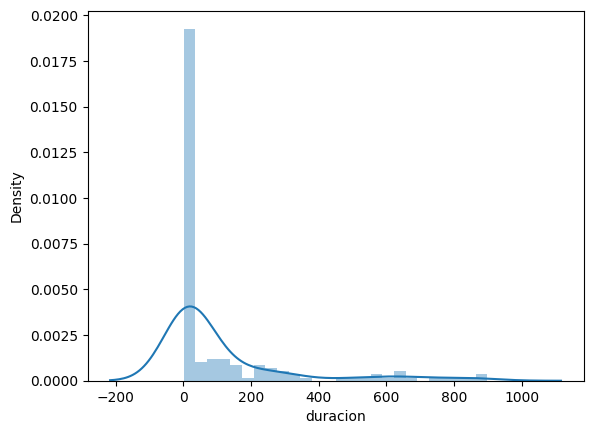

In [41]:
sns.distplot(dataframe['duracion']);

In [42]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [43]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

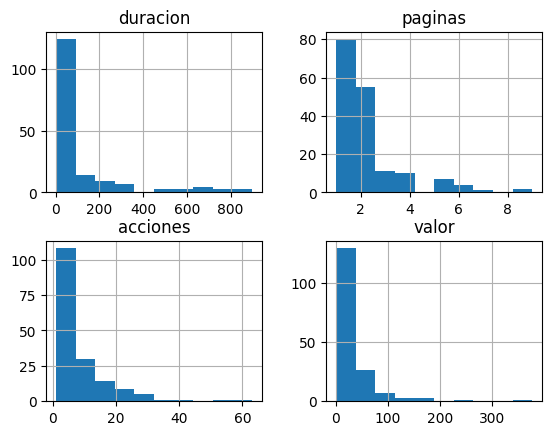

In [44]:
dataframe.drop('clase', axis=1).hist()
plt.show()

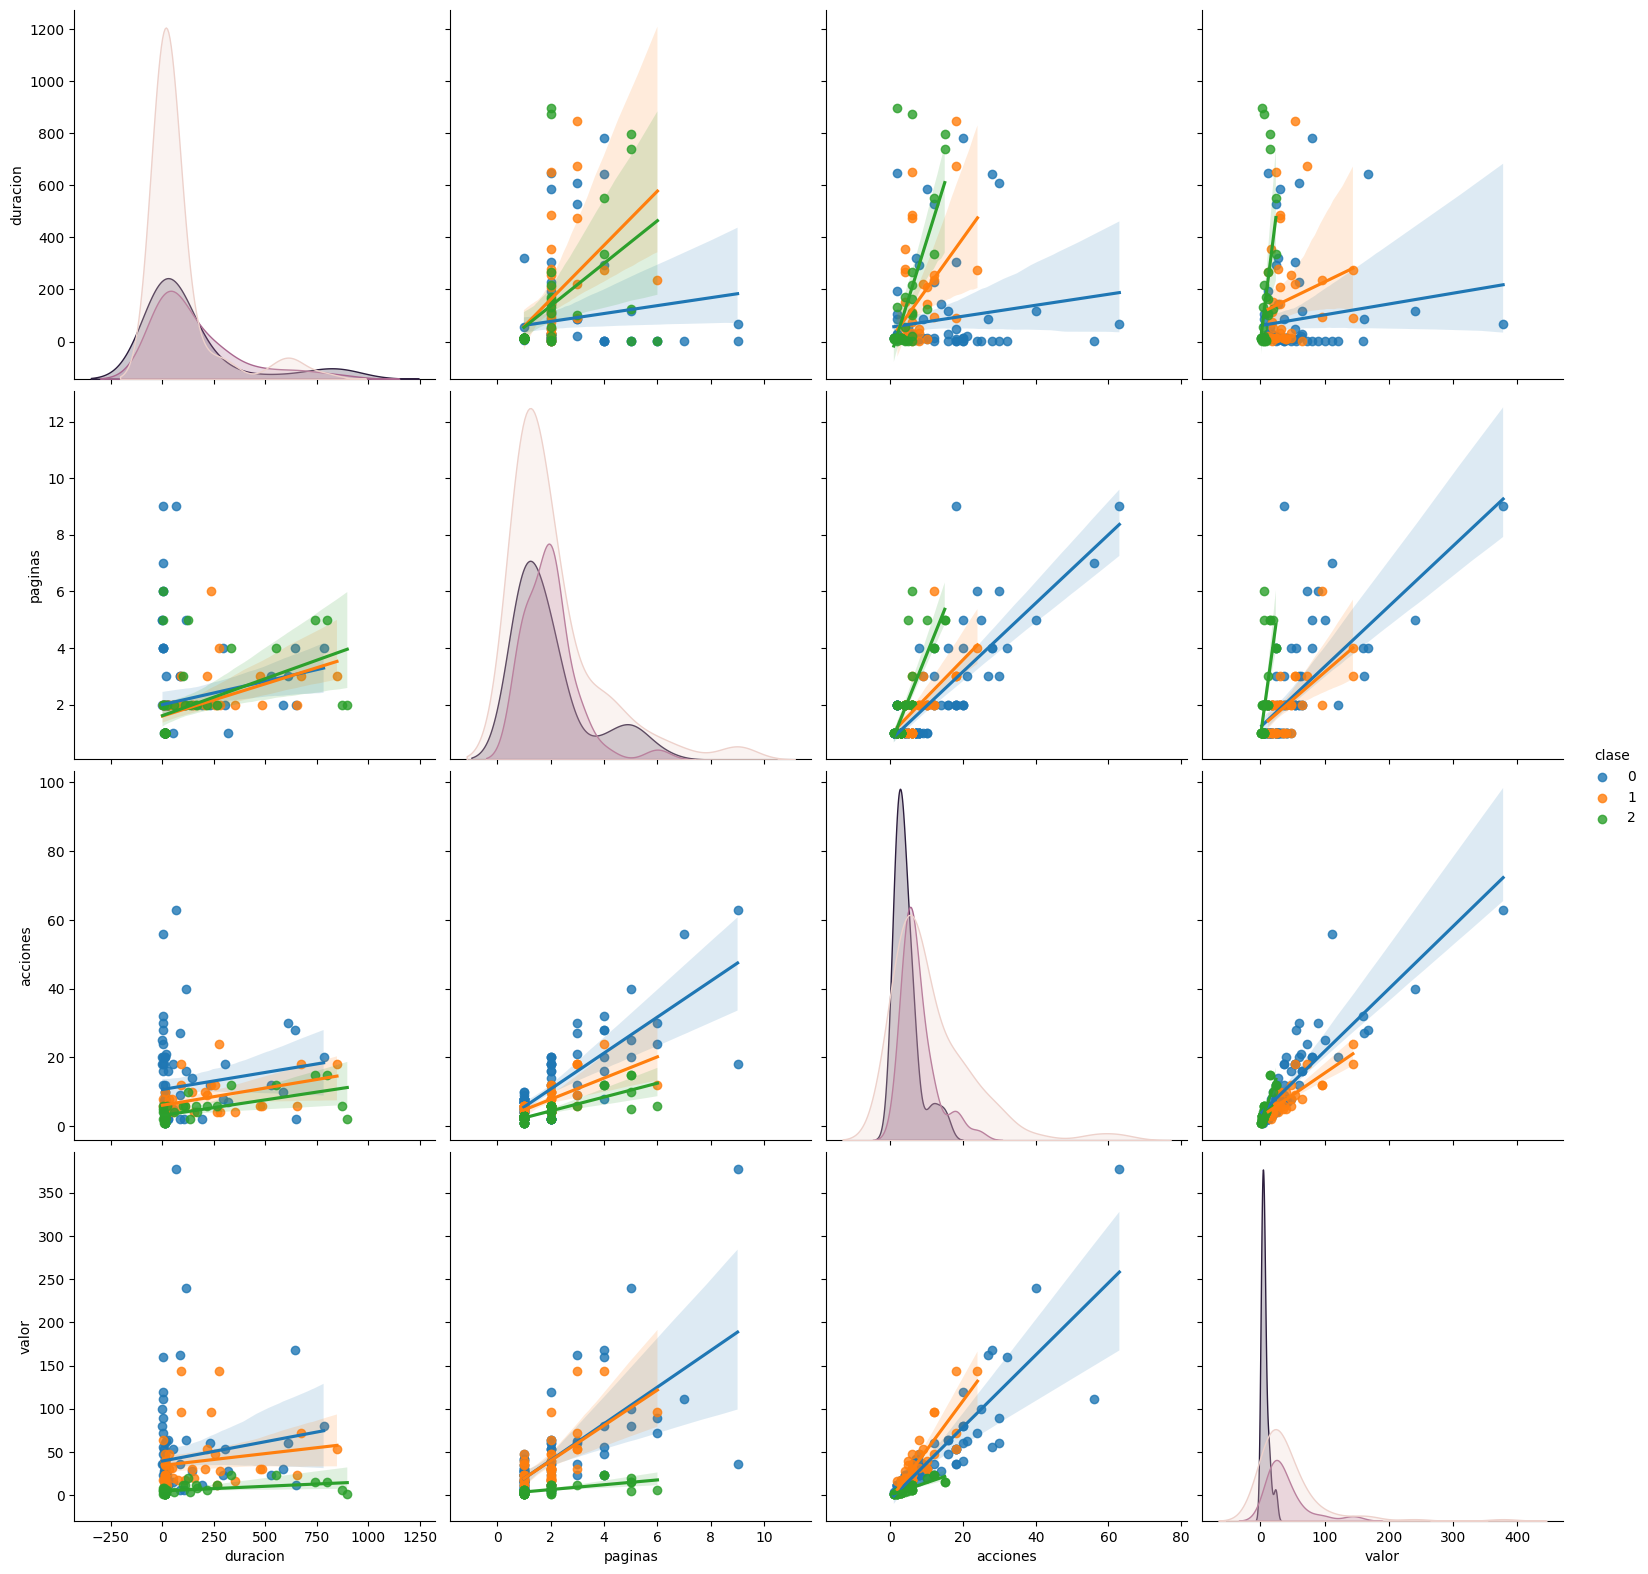

In [45]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

## Creamos el modelo

In [46]:
X = np.array(dataframe.drop(columns=['clase']))
y = np.array(dataframe['clase'])

In [47]:
X = dataframe.drop("clase",axis=1).values
y = dataframe["clase"].values

In [48]:
X

array([[  7.   ,   2.   ,   4.   ,   8.   ],
       [ 21.   ,   2.   ,   6.   ,   6.   ],
       [ 57.   ,   2.   ,   4.   ,   4.   ],
       [101.   ,   3.   ,   6.   ,  12.   ],
       [109.   ,   2.   ,   6.   ,  12.   ],
       [125.   ,   5.   ,  10.   ,  20.   ],
       [133.   ,   2.   ,   2.   ,   4.   ],
       [162.   ,   2.   ,   6.   ,  12.   ],
       [170.   ,   2.   ,   4.   ,   8.   ],
       [217.   ,   2.   ,   6.   ,   6.   ],
       [266.   ,   2.   ,   6.   ,  12.   ],
       [335.   ,   4.   ,  12.   ,  24.   ],
       [553.   ,   4.   ,  12.   ,  24.   ],
       [798.   ,   5.   ,  15.   ,  15.   ],
       [872.   ,   2.   ,   6.   ,   6.   ],
       [  1.105,   2.   ,   4.   ,   8.   ],
       [  2.091,   5.   ,   5.   ,   5.   ],
       [ 21.   ,   2.   ,   4.   ,  12.   ],
       [ 33.   ,   2.   ,   8.   ,  48.   ],
       [ 49.   ,   2.   ,   8.   ,  32.   ],
       [ 74.   ,   2.   ,   6.   ,  18.   ],
       [ 93.   ,   2.   ,  12.   ,  96.   ],
       [14

In [49]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [72]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 1 0 0 2 0
 0 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 1 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [74]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))
#predicions_proba

[[0.21 0.11 0.68]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.16 0.09 0.75]
 [0.33 0.13 0.55]
 [0.22 0.1  0.68]
 [0.03 0.03 0.94]
 [0.26 0.11 0.63]
 [0.08 0.06 0.86]
 [0.   0.   1.  ]
 [0.14 0.08 0.77]
 [0.39 0.12 0.48]
 [0.13 0.07 0.8 ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.22 0.11 0.67]
 [0.   0.   1.  ]
 [0.61 0.38 0.01]
 [0.55 0.45 0.  ]
 [0.71 0.29 0.  ]
 [0.69 0.31 0.  ]
 [0.32 0.68 0.  ]
 [0.81 0.19 0.  ]
 [0.44 0.56 0.  ]
 [0.79 0.21 0.  ]
 [0.35 0.65 0.  ]
 [0.06 0.94 0.  ]
 [0.74 0.26 0.  ]
 [0.43 0.51 0.06]
 [0.52 0.48 0.  ]
 [0.35 0.65 0.  ]
 [0.22 0.78 0.  ]
 [0.29 0.71 0.  ]
 [0.26 0.74 0.  ]
 [0.72 0.28 0.  ]
 [0.01 0.   0.99]
 [0.03 0.02 0.95]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.8  0.2  0.  ]
 [0.58 0.42 0.  ]
 [0.51 0.49 0.  ]
 [0.23 0.77 0.  ]
 [0.66 0.34 0.  ]
 [0.28 0.72 0.  ]
 [0.64 0.36 0.  ]
 [0.39 0.61 0.  ]
 [0.73 0.27 0.  ]
 [0.99 0.01 0.  ]
 [0.78 0.22 0.  ]
 [0.78 0.22 0.  ]
 [0.97 0.03 0.  ]
 [0.99 0.01 0.  ]
 [0.91 0.09 0.  ]
 [0.98 0.0

In [75]:
model.score(X, y)

0.7705882352941177

In [76]:
model.classes_

array([0, 1, 2])

# Validación del Modelo

In [77]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [57]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
# cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(cv_results)
# print(msg)

In [78]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [79]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
predictions

0.8529411764705882


array([1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2])

In [60]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


## Resultados

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [62]:
c_matrix = confusion_matrix(Y_test, predictions)

In [63]:
print(c_matrix)

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


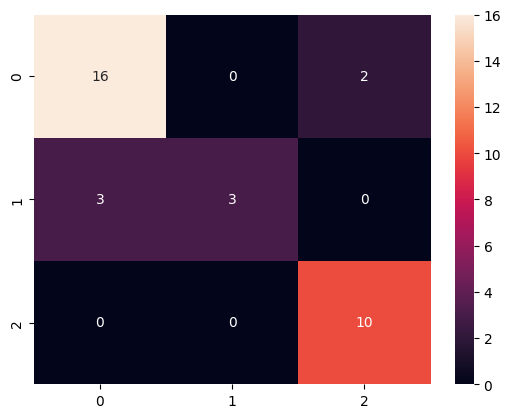

In [64]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

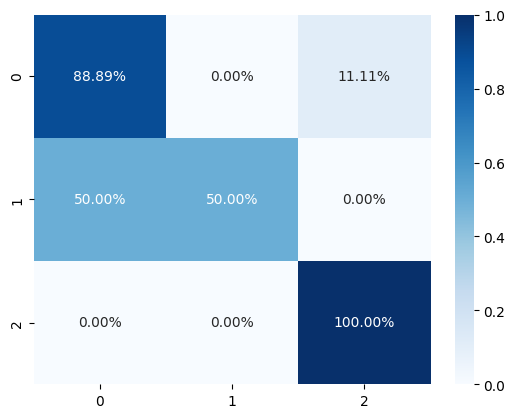

In [65]:
sns.heatmap(confusion_matrix(Y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

multilabel_confusion_matrix(Y_test, predictions)

array([[[13,  3],
        [ 2, 16]],

       [[28,  0],
        [ 3,  3]],

       [[22,  2],
        [ 0, 10]]])

Una matriz de confusion para cada clase

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

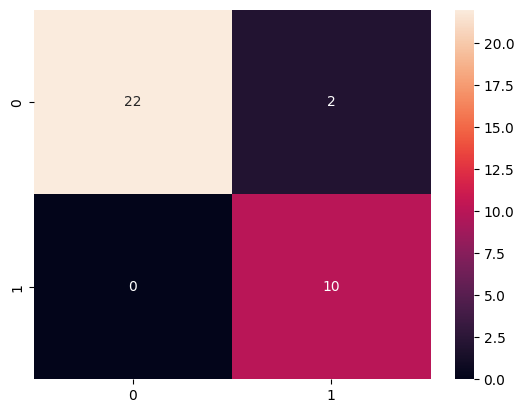

In [67]:
sns.heatmap(multilabel_confusion_matrix(Y_test, predictions)[2], annot=True);

# Clasificación de nuevos registros

In [68]:
X_new = pd.DataFrame({'duracion': [8],
                     'paginas': [5],
                     'acciones': [5],
                     'valor': [2]})
X_new

,duracion,paginas,acciones,valor
0,8,5,5,2


In [69]:
X_new.values

array([[8, 5, 5, 2]])

In [70]:
model.predict(X_new.values)

array([2])

In [80]:
model.predict_proba(X_new.values)

array([[1.04479167e-06, 9.17823675e-07, 9.99998037e-01]])